In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline

In [2]:
df = pd.read_csv('Glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

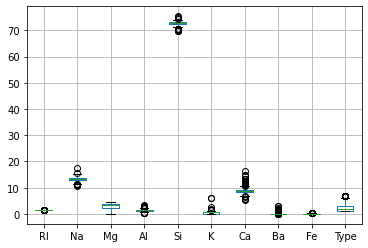

In [5]:
df.boxplot()

In [6]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
X = df.iloc[:, :-1]

In [8]:
y = df['Type']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
X = sc.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
ypred = knn.predict(X_test)

In [18]:
ypred

array([1, 7, 1, 7, 2, 5, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 7, 1, 1, 2, 1, 7, 2],
      dtype=int64)

In [19]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7660818713450293, 0.6976744186046512)

In [29]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

In [30]:
train_acc

[0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293,
 0.7660818713450293]

In [31]:
test_acc

[0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512,
 0.6976744186046512]